In [1]:
import pandas as pd
df = pd.read_csv("combined_output.csv")
df.head()

,name,rating,time,comment,title
0,掉线,1,2016-06-08 02:37:32,【C-】我看过剪辑最烂的电影之一，不夸张地说剪辑水平几乎是小时代的级别，基本的剪辑点不对，基...,Warcraft
1,二月鸟语,2,2016-06-06 19:19:51,点映看两遍，看得昏昏欲睡，无聊至极。故事又老又俗套又狗血不说，故事都没讲明白，打来打去都没高...,Warcraft
2,rainmanyuan,2,2016-06-07 22:59:42,故事一般，特效凑合，排片量太大了，ume23:59居然排了8场，加上0点的，2点的午夜场一共...,Warcraft
3,地平线的旧火车,1,2016-06-08 07:53:24,魔兽≈周星驰现在的电影≈小时代……,Warcraft
4,放心办事员小李,2,2016-05-31 04:05:04,你们的世界好难懂…为什么人类首领那么弱…为什么人类首领不会魔法…为什么会魔法的隐居了还要被揪...,Warcraft


In [2]:
# import jieba
# import jieba.posseg as pseg
# from collections import Counter
# import numpy as np
# df['segmented'] = df['comment'].apply(lambda x: ' '.join(jieba.cut(x)) if pd.notna(x) else '')

In [3]:
comments = df["comment"].dropna().tolist()

In [4]:
from sentence_transformers import SentenceTransformer

# Use a multilingual model or a specific Chinese one
model = SentenceTransformer("shibing624/text2vec-base-chinese")
# For more accurate results with Chinese: "shibing624/text2vec-base-chinese"

embeddings = model.encode(comments, show_progress_bar=True)

/Users/elimarx/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 71/71 [00:28<00:00,  2.46it/s]


In [10]:
from sklearn.cluster import KMeans

num_clusters = 40  # tweak this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

df['cluster'] = labels

In [11]:
for cluster_num in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster_num}:")
    #problem here where some of the clusters only have one comment in them
    sample_comments = df[df['cluster'] == cluster_num]['comment'].sample(4, random_state=42)
    for comment in sample_comments:
        print(" -", comment)


Cluster 0:
 - 欢乐，正能量，但是毫无新意，流水线产品
 - 煽情胜过激情，打架多过飙车，3D效果基本为0
 - @CBD万达 聒噪得使人昏睡，在汽车跳伞和被导弹追击两部分可看。
 - 千篇一律的流水线作品

Cluster 1:
 - 80%人设竟然都是傻逼
 - 男主线真恶心
 - 天天炒作有意思？
 - 抑制不住的傻气

Cluster 2:
 - 这是恐怖片
 - 吓人用的吧……看完做恶梦了
 - 听不懂德语配音，完全认不出来吴彦祖！
 - 拿著拍mv的態度拍電影嗎⋯⋯

Cluster 3:
 - 你的奥斯卡的荒诞有一种zzzq的尬美，这种程度的无厘头甚至不如周星驰手中最次的作品。奥斯卡的评委是好片看多了看不出什么是大杂烩烂片吗？
 - 防不胜防啊，四娘穿越到联盟给写的剧本吧。这捞逼电影不清真
 - 完全瞄准中国市场的特供版圈钱电影。广告植入疯狂又生硬，片中所有中国元素都显得无比违和和出戏。跪舔姿势真是难看又生硬。并不适合的东西为什么非要拧巴在一起？
 - 我也很想让豆瓣回到不是任何一部模式化的动漫化的大数据化的垃圾都能被一窝蜂打五星推到9分的时候

Cluster 4:
 - 你记住卡梅隆，泰坦尼克号的票钱我还你了，算五十，现在你赶紧把剩下的八十还给我！！！
 - 速度与激情版驯龙记。
 - 《哆啦A梦：大雄的地球交响乐》≤≤《浴火之路》
 - 范迪塞尔看了直呼过瘾😅

Cluster 5:
 - 技术一流，但是透视出的科幻观念完全是战争复仇片的逻辑，站在文学角度，创作力并不具有突出的特质。卡氏是个好导演，但比起卢卡斯还差一点大气的人生观；比起库布里克还差一大截开阔的宇宙观。从潘多拉星球人民的沟通方式上与一直在影片中提到的圣母传递信息方式存在断裂，该处进化的结果缺乏想象力。
 - 低幼无比，什么无人机全息投影，这么Low的设备托尼斯塔克要是看到简直能笑掉大牙。但凡是挑几个欧洲城市作为外景地的剧本，无一不显示出创作团队的信心不足。不要想蒙混过关，老子也是经常出国旅游的好吗吓唬谁？
 - 2.5 / 额。甚至会有点让人怀念《海王》。唯一有趣的点大概是对重力的操纵，或者说是对水下与空中两者边界处重力的形塑，这种技巧造就了第三幕开头那一连串内爆式动作的连贯性。其他不管是对家庭、种族、自然、技术的思考，都没有任何新颖之处。以及，如此人类中心的环保想象

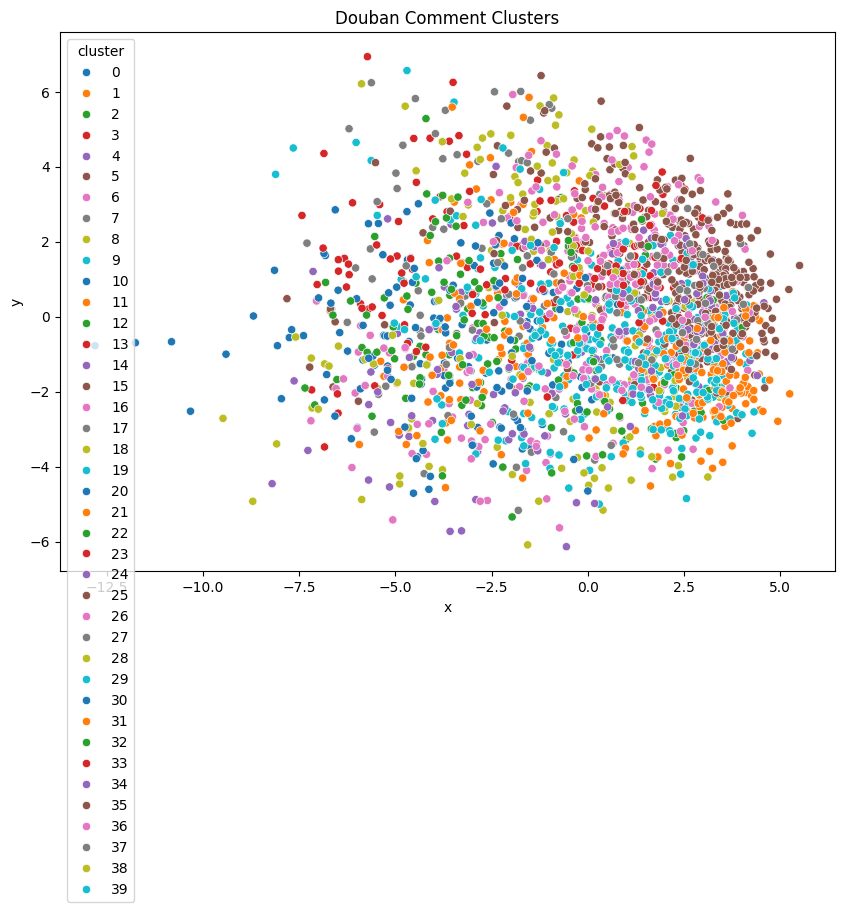

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

df['x'] = reduced[:, 0]
df['y'] = reduced[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Douban Comment Clusters")
plt.show()

In [13]:
from keybert import KeyBERT

kw_model = KeyBERT(model)
for i in range(num_clusters):
    cluster_comments = df[df['cluster'] == i]['comment'].tolist()
    joined = " ".join(cluster_comments)
    keywords = kw_model.extract_keywords(joined, top_n=5)
    print(f"Cluster {i} keywords:", keywords)

Cluster 0 keywords: [('有些彩虹屁就是跟风和国外滤镜', 0.6687), ('游戏还能改编出什么好东西来', 0.6367), ('了很多异形系列的创意', 0.6105), ('要不变6彻底重启改回2d动画吧', 0.6039), ('逆转的铺垫完全不够', 0.6027)]
Cluster 1 keywords: [('人设竟然都是傻逼', 0.6808), ('大部分时间觉得好蠢', 0.6788), ('整个就是个逗比广告', 0.6785), ('剧情好傻', 0.6763), ('真是人傻钱多国的最爱了', 0.6684)]
Cluster 2 keywords: [('就我一个人觉得荷兰弟演技很尬吗', 0.6778), ('完全认不出来吴彦祖', 0.607), ('信了什么邪教能写出这种剧情', 0.5996), ('这意识形态设定比想得还可怕', 0.5576), ('好莱坞的手撕鬼子', 0.5471)]
Cluster 3 keywords: [('只是为了平衡不知道是水军还是脑残粉的五星', 0.7493), ('开场我还以为迪士尼终于要把这个堕落成青春片的系列拔高了', 0.7251), ('卖拷贝老师想要把这系列变成合拍片从此在天朝坐地收钱的一片衷心可表舒特奶', 0.7221), ('这样刷分和xx脑残帮', 0.7191), ('除了秀颜值就是毫无节制地填塞特效', 0.7124)]
Cluster 4 keywords: [('没参与过超级英雄电影都不能说自己是好莱坞明星了吗现在', 0.7159), ('一星不思进取爆米花', 0.6684), ('一星平庸爆米花', 0.643), ('极限特工的阴影已经笼罩了所有范迪塞尔参与的片子', 0.6046), ('又在打造宇宙了', 0.5939)]
Cluster 5 keywords: [('烂到我怀疑环球是不是为了坑传奇故意派的人毁掉电影的', 0.7978), ('我没见过这么无聊的慢镜和这么发病的剪辑', 0.7719), ('大法也是生生把一个可以r级出彩的片子阉割成了现在这种插科打诨卖萌卖腐的漫威劣质跟风作', 0.7672), ('破逼垃圾电影剧情老套的你吗一比', 0.7666), ('过于无厘头又把剧情切得稀碎不仅让人难以投入又没法完全放